In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline
import warnings
from itertools import combinations
import scipy.stats
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df=pd.read_csv("hmeq.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [4]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [5]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [7]:
#data.isna().sum() / data.shape[0] *100

In [8]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

<BarContainer object of 13 artists>

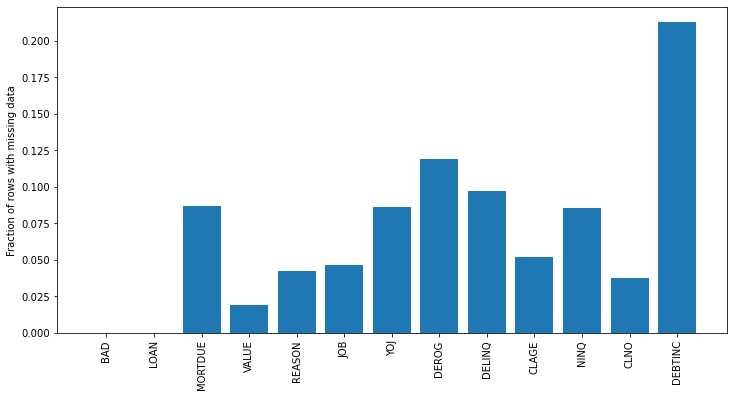

In [9]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(12,6))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<AxesSubplot:xlabel='VALUE', ylabel='Density'>

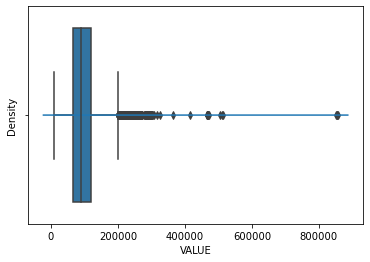

In [13]:
#https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/
# Distribution plot
sns.boxplot(df.VALUE)
sns.distplot(df.VALUE)
#bunu hepsine yapıp yorumlayabilirsin.

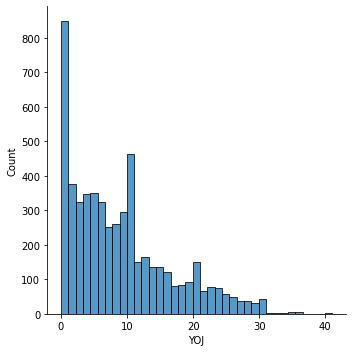

In [11]:
#fig, ax = plt.subplots(figsize=(10, 8))
sns.displot(df.YOJ)
#bunu da hepsine yapabilirsin

Missing Value İmputation

In [12]:
df['MORTDUE']=df['MORTDUE'].fillna(df['MORTDUE'].mean())
df['YOJ']=df['YOJ'].fillna(df['YOJ'].mean())
df['DEROG']=df['DEROG'].fillna(df['DEROG'].mean())
df['DELINQ']=df['DELINQ'].fillna(df['DELINQ'].mean())
df['NINQ']=df['NINQ'].fillna(df['NINQ'].mean())
df['DEBTINC']=df['DEBTINC'].fillna(df['DEBTINC'].mean())
df['VALUE']=df['VALUE'].fillna(df['VALUE'].mean())
df['CLAGE']=df['CLAGE'].fillna(df['CLAGE'].mean())
df['CLNO']=df['CLNO'].fillna(df['CLNO'].mean())
df.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     252
JOB        279
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

In [13]:
df['JOB'] = df['JOB'].fillna(df['JOB'].mode()[0])
df['REASON'] = df['REASON'].fillna(df['REASON'].mode()[0])
df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [14]:
df.drop_duplicates()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,DebtCon,Other,16.000000,0.00000,0.000000,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.0000,92937.000000,DebtCon,Other,16.000000,0.00000,0.000000,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.0000,92924.000000,DebtCon,Other,15.000000,0.00000,0.000000,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.0000,91861.000000,DebtCon,Other,14.000000,0.00000,0.000000,213.892709,0.000000,16.000000,34.340882


<Figure size 432x288 with 0 Axes>

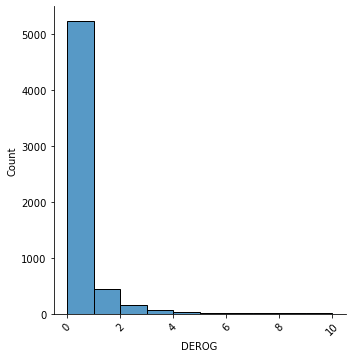

<Figure size 432x288 with 0 Axes>

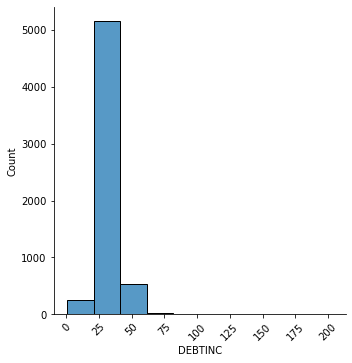

<Figure size 432x288 with 0 Axes>

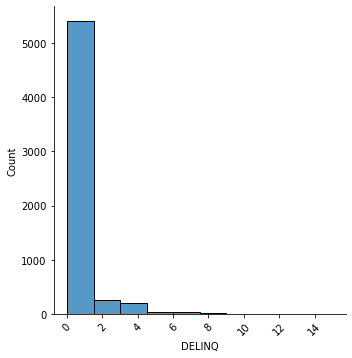

<Figure size 432x288 with 0 Axes>

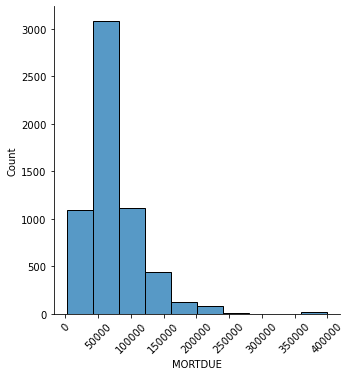

<Figure size 432x288 with 0 Axes>

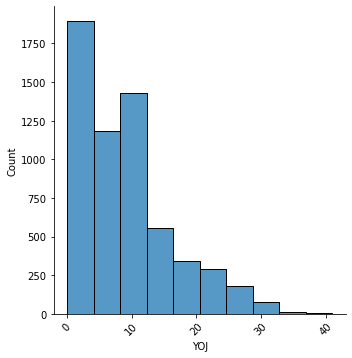

<Figure size 432x288 with 0 Axes>

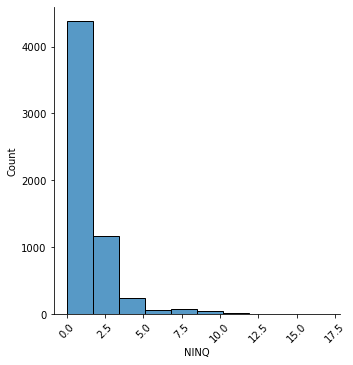

<Figure size 432x288 with 0 Axes>

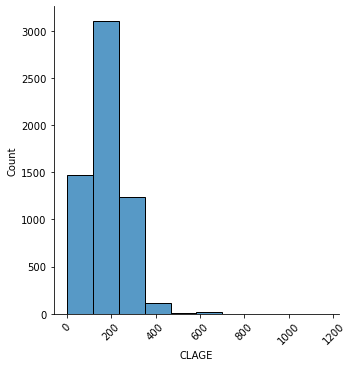

<Figure size 432x288 with 0 Axes>

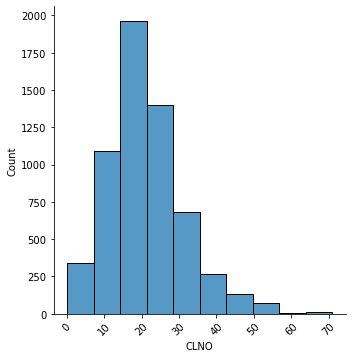

<Figure size 432x288 with 0 Axes>

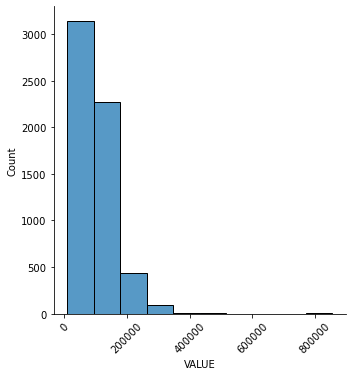

<Figure size 432x288 with 0 Axes>

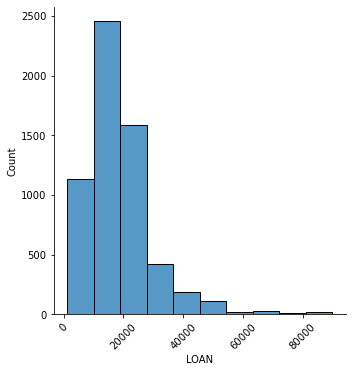

<Figure size 432x288 with 0 Axes>

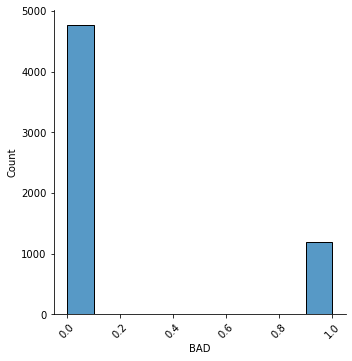

In [15]:
numerical = ['DEROG','DEBTINC','DELINQ','MORTDUE','YOJ','NINQ','CLAGE','CLNO','VALUE','LOAN','BAD']
for col in numerical:
    x=df[col]
    plt.figure()
    sns.displot(x, bins = 10)
    plt.xticks(rotation = 45)
    plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["REASON"] = le.fit_transform(df["REASON"])
df["JOB"] = le.fit_transform(df["JOB"])


<AxesSubplot:>

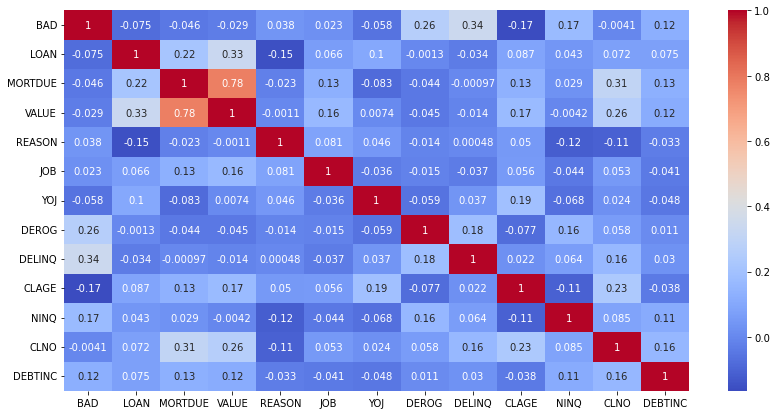

In [17]:
df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [18]:
#sns.pairplot(data)
#plt.show()

In [19]:
#korelasyon hesabı yapıyor https://www.youtube.com/watch?v=08c1Tccc6yI&ab_channel=VeriBilimiOkulu

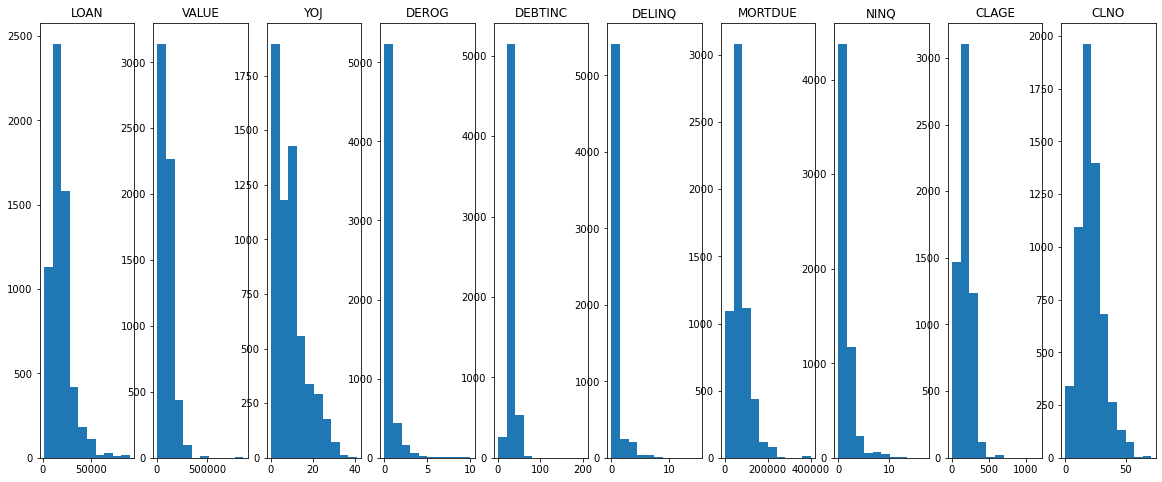

In [20]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6,  ax7, ax8, ax9,ax10) = plt.subplots(1, 10, figsize = (20, 8))
 
ax1.hist(df["LOAN"])
ax1.set_title("LOAN")
 
ax2.hist(df["VALUE"])
ax2.set_title("VALUE")
 
ax3.hist(df["YOJ"])
ax3.set_title("YOJ")

ax4.hist(df["DEROG"])
ax4.set_title("DEROG")
 
ax5.hist(df["DEBTINC"])
ax5.set_title("DEBTINC")
 
ax6.hist(df["DELINQ"])
ax6.set_title("DELINQ")

ax7.hist(df["MORTDUE"])
ax7.set_title("MORTDUE")
 
ax8.hist(df["NINQ"])
ax8.set_title("NINQ")
 
ax9.hist(df["CLAGE"])
ax9.set_title("CLAGE")

ax10.hist(df["CLNO"])
ax10.set_title("CLNO")
 

plt.show()

In [21]:
import numpy as np
import pandas as pd
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    
    return(d)
    
outliers(df['LOAN'])


,sub,values
0,IQR,12200.000000
1,Upper Bound,41600.000000
2,Lower Bound,-7200.000000
3,Sum outliers,256.000000
4,percentage outliers,4.295302


In [22]:
outliers(df['LOAN'])

,sub,values
0,IQR,12200.000000
1,Upper Bound,41600.000000
2,Lower Bound,-7200.000000
3,Sum outliers,256.000000
4,percentage outliers,4.295302


In [23]:
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [24]:
def iqr(df,var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    return df[(df[var] < lower_t) | (df[var] > upper_t)]

derog = iqr(df, "DEROG")
debtinc = iqr(df, "DEBTINC")
delinq = iqr(df, "DELINQ")
mortdue = iqr(df, "MORTDUE")
yoj = iqr(df, "YOJ")
ninq = iqr(df, "NINQ")
clage = iqr(df, "CLAGE")
clno = iqr(df, "CLNO")
value = iqr(df, "VALUE")
loan = iqr(df, "LOAN")

print(len(derog), len(debtinc), len(delinq), len(mortdue), len(yoj), len(ninq),len(clage), len(clno), len(value), len(loan))

1433 247 547 308 211 177 66 219 347 256


In [25]:
numerical = ['DEROG','DEBTINC','DELINQ','MORTDUE','YOJ','NINQ','CLAGE','CLNO','VALUE','LOAN']
def outlier(col):
    iqr = (np.quantile(df[col], 0.75))-(np.quantile(df[col], 0.25))
    upper_bound = np.quantile(df[col], 0.75)+(1.5*iqr)
    lower_bound = np.quantile(df[col], 0.25)-(1.5*iqr)
    df[col] = np.where(df[col] > upper_bound,
                                   upper_bound,df[col]) #higher
    df[col] = np.where(df[col] < lower_bound, 
                                   lower_bound,df[col])
    
outlier('DEROG')

In [26]:
outlier('DEBTINC')

In [27]:
outlier('DELINQ')

In [28]:
outlier('MORTDUE')

In [29]:
outlier('YOJ')

In [30]:
outlier('NINQ')

In [31]:
outlier('CLAGE')

In [32]:
outlier('CLNO')

In [33]:
outlier('VALUE')

In [34]:
outlier('LOAN')

In [35]:
x=df.drop(columns=['BAD'],axis=1)
y=df['BAD']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 1 )

In [37]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# Veri Setinin Kopyasının Alınması

In [38]:
ANN_X_train = x_train.copy()
ANN_X_test = x_test.copy()

DT_X_train = x_train.copy()
DT_X_test = x_test.copy()

xgboost_X_train = x_train.copy()
xgboost_X_test = x_test.copy()

svm_X_train = x_train.copy()
svm_X_test = x_test.copy()

kn_X_train = x_train.copy()
kn_X_test = x_test.copy()

k_means_X_train = x_train.copy()
k_means_X_test = x_test.copy()

naive_bayes_X_train = x_train.copy()
naive_bayes_X_test = x_test.copy()

# Decision Tree

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
sc = StandardScaler()
x_train = sc.fit_transform(DT_X_train)
x_test = sc.transform(DT_X_test)

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
dt_accuracy = metrics.accuracy_score(y_test, y_pred)*100
dt_accuracy

86.66107382550335

# XGBoost

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
print(xgboost_X_test)

[[ 0.38635677  2.24763959  0.07972013 ... -0.84647161  2.32260142
   0.70921735]
 [ 0.36471765  2.09824817  1.96541704 ... -0.84647161 -0.44442286
   1.5672875 ]
 [ 1.53323009 -1.58977906 -0.86129498 ... -0.08572483 -1.74655193
   0.70654677]
 ...
 [ 1.04634991  0.08190008 -1.26279701 ...  0.05581595 -0.87846588
  -2.29362077]
 [ 1.10044771  0.14728615  0.7044338  ... -0.84647161  0.20664168
   0.43526619]
 [ 0.61356752  0.08190008 -0.44051415 ... -0.84647161  0.31515244
  -1.3781882 ]]


In [43]:
model.fit(xgboost_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [44]:
y_pred = model.predict(xgboost_X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [45]:
xgboost_accuracy = accuracy_score(y_test, y_pred)*100
xgboost_accuracy

91.19127516778524

# Support Vector Machine

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(svm_X_train,y_train)
y_pred = clf.predict(svm_X_test)

In [47]:
svm_accuracy = accuracy_score(y_test,y_pred)*100
svm_accuracy

79.19463087248322

# k-nearest neighbor

In [48]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(kn_X_train,y_train)
y_pred = knn.predict(kn_X_test)
knn_accuracy = metrics.accuracy_score(y_test, y_pred)*100
knn_accuracy

87.5

# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

classifier = GaussianNB()
classifier.fit(naive_bayes_X_train, y_train)
y_pred = classifier.predict(naive_bayes_X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.61409395973155


# ANN Training


In [50]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(ANN_X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, knn_accuracy = model.evaluate(ANN_X_train, y_train,)

print('Accuracy: %.2f' % (knn_accuracy*100))

Epoch 1/150
477/477 [==============================] - 2s 2ms/step - loss: 0.5151 - accuracy: 0.7984
Epoch 2/150
477/477 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.8142
Epoch 3/150
477/477 [==============================] - 1s 2ms/step - loss: 0.4183 - accuracy: 0.8205
Epoch 4/150
477/477 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8272
Epoch 5/150
477/477 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8278
Epoch 6/150
477/477 [==============================] - 1s 2ms/step - loss: 0.4007 - accuracy: 0.8324
Epoch 7/150
477/477 [==============================] - 1s 2ms/step - loss: 0.3958 - accuracy: 0.8322
Epoch 8/150
477/477 [==============================] - 1s 2ms/step - loss: 0.3914 - accuracy: 0.8349
Epoch 9/150
477/477 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8412
Epoch 10/150
477/477 [==============================] - 1s 2ms/step - loss: 0.3810 - accura

# Implementation of XGBOOST Model

In [51]:
from xgboost import XGBClassifier
from sklearn.datasets import make_blobs
from numpy import asarray
# create the inputs and outputs

# define model
model = XGBClassifier()
# fit model
model.fit(xgboost_X_train, y_train)
# define input
new_input = [4000,54543,61777,0,0,21,0,0,205.58668003,0,19,21.806563464]
# get prediction for new input
new_output = model.predict(asarray([new_input]))
# summarize input and output
print(new_input, new_output)

[00:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[4000, 54543, 61777, 0, 0, 21, 0, 0, 205.58668003, 0, 19, 21.806563464] [1]


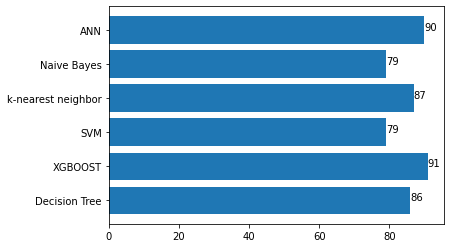

In [52]:
import matplotlib.pyplot as plt
x = ['Decision Tree','XGBOOST', 'SVM', 'k-nearest neighbor', 'Naive Bayes', 'ANN']
y = [86,91, 79, 87, 79, 90]
plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()